<a href="https://colab.research.google.com/github/jcmachicao/modpred_2/blob/main/modpred2__simulacion_crimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**02.04**
#### Cuaderno 2, Ejercicio 4
#### **Curso Modelamiento Predictivo**
---
# **Aplicación de Monte Carlo**
* Autor: José Carlos Machicao
* Licencia: [GestioDinámica](http://www.gestiodinamica.com) 2020

# Simulador de Casos Policiales

Este simulador utiliza el modelo de Monte Carlo para simular una estimación de casos más asociados a eventos violentos.

In [186]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [177]:
N_CASOS = 3000

In [178]:
def genera_indagacion():
  zona = np.random.choice(['zona_1', 'zona_2', 'zona_3', 'zona_4', 'zona_5'], p=[0.1, 0.2, 0.4, 0.2, 0.1])
  tipo_lugar = np.random.choice(['bares', 'calle', 'casa', 'tienda', 'descampado'], p=[0.10, 0.25, 0.10, 0.10, 0.45])
  denuncia = np.random.choice(['hay_denuncia', 'no_hay_denuncia'])
  dia = np.random.choice(['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sábado', 'domingo'], p=[0.05, 0.05, 0.25, 0.20, 0.05, 0.35, 0.05])
  return [zona, tipo_lugar, denuncia, dia]

In [189]:
def investigacion():
  # esta generación de datos si bien se genera aleatoriamente
  # se supone que son los resultados de las investigaciones reales
  culpa = np.random.choice(['culpable', 'inocente'], p=[0.2, 0.8])
  return culpa

In [190]:
culpas = []
for j in range(N_CASOS):
  culpas.append(investigacion())

In [191]:
casos = []
for j in range(N_CASOS):
  dato = genera_indagacion()
  casos.append(dato)
casos_df = pd.DataFrame(casos)
casos_df.columns = ['zona', 'lugar', 'denuncia', 'dia']
casos_df['culpa'] = culpas

In [192]:
casos_df.head(2)

,zona,lugar,denuncia,dia,culpa
0,zona_1,descampado,no_hay_denuncia,miercoles,inocente
1,zona_2,tienda,hay_denuncia,sábado,inocente


In [193]:
casos_positivos = casos_df[casos_df.culpa=='culpable']

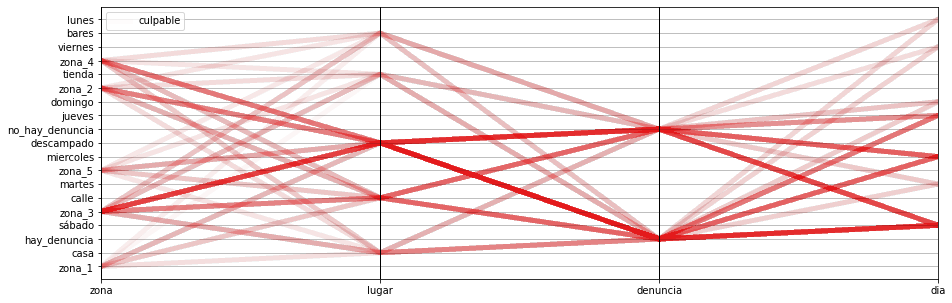

In [195]:
DATA = casos_positivos
plt.figure(figsize=(15, 5), facecolor='white')
pd.plotting.parallel_coordinates(DATA, class_column='culpa', lw=5, alpha=0.01, colormap='Set1')
plt.legend(loc='best')
plt.show()

In [188]:
for col in DATA.columns:
 print(Counter(DATA[col]))

Counter({'zona_3': 1193, 'zona_4': 627, 'zona_2': 597, 'zona_5': 295, 'zona_1': 288})
Counter({'descampado': 1339, 'calle': 757, 'tienda': 319, 'bares': 318, 'casa': 267})
Counter({'no_hay_denuncia': 1507, 'hay_denuncia': 1493})
Counter({'sábado': 1061, 'miercoles': 751, 'jueves': 597, 'viernes': 162, 'lunes': 152, 'domingo': 149, 'martes': 128})
Counter({'culpable': 1510, 'inocente': 1490})
